In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier

In [30]:
#from google.colab import drive
#drive.mount('/content/drive')
df = pd.read_csv("house_train.csv")

In [31]:
df

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,191000
1,1,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
2,2,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,105000
3,3,20,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,600,8,2007,WD,Normal,139900
4,4,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,4,2007,COD,Normal,157900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1091,1091,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1092,1092,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
1093,1093,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950


In [32]:
df.describe()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1095.000000,1095.000000,895.000000,1095.000000,1095.000000,1095.00000,1095.000000,1095.000000,1091.000000,1095.000000,...,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,547.000000,57.118721,70.394413,10747.046575,6.129680,5.56895,1971.107763,1984.854795,103.368469,448.178082,...,96.194521,49.633790,21.118721,3.918721,15.917808,3.152511,40.529680,6.361644,2007.818265,181712.286758
std,316.243577,42.624531,25.219301,11065.878057,1.366746,1.10448,30.605697,20.732472,171.644715,457.898505,...,130.396336,69.134174,61.315608,32.186042,56.844110,43.008391,328.354566,2.680894,1.325752,77955.082565
min,0.000000,20.000000,21.000000,1300.000000,1.000000,1.00000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,273.500000,20.000000,59.000000,7589.000000,5.000000,5.00000,1953.500000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,547.000000,50.000000,70.000000,9600.000000,6.000000,5.00000,1972.000000,1994.000000,0.000000,387.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,820.500000,70.000000,80.000000,11700.000000,7.000000,6.00000,2001.000000,2004.000000,166.000000,724.000000,...,168.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1094.000000,190.000000,313.000000,215245.000000,10.000000,9.00000,2010.000000,2010.000000,1378.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000,745000.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1095 non-null   int64  
 1   MSSubClass     1095 non-null   int64  
 2   MSZoning       1095 non-null   object 
 3   LotFrontage    895 non-null    float64
 4   LotArea        1095 non-null   int64  
 5   Street         1095 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1095 non-null   object 
 8   LandContour    1095 non-null   object 
 9   Utilities      1095 non-null   object 
 10  LotConfig      1095 non-null   object 
 11  LandSlope      1095 non-null   object 
 12  Neighborhood   1095 non-null   object 
 13  Condition1     1095 non-null   object 
 14  Condition2     1095 non-null   object 
 15  BldgType       1095 non-null   object 
 16  HouseStyle     1095 non-null   object 
 17  OverallQual    1095 non-null   int64  
 18  OverallC

In [34]:
df.groupby("MSSubClass").mean()

/tmp/ipykernel_13934/2351222106.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("MSSubClass").mean()


,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,,,,,,,,,,,,,,,,,,,,,
20,549.386139,78.006079,11833.207921,6.044554,5.517327,1978.225248,1985.777228,110.287129,560.965347,63.433168,...,97.465347,46.051980,13.477723,6.502475,18.059406,1.603960,29.034653,6.262376,2007.896040,185353.403465
30,589.212766,58.951220,7657.191489,4.531915,5.765957,1926.680851,1968.063830,2.297872,235.893617,25.446809,...,29.744681,31.914894,48.829787,0.000000,6.085106,0.000000,40.851064,5.872340,2007.765957,95961.702128
40,464.000000,40.000000,14497.500000,6.500000,6.500000,1952.500000,1991.500000,0.000000,814.000000,0.000000,...,134.000000,0.000000,91.500000,0.000000,0.000000,0.000000,0.000000,7.000000,2008.500000,206000.000000
45,568.444444,55.444444,6797.111111,5.555556,6.111111,1933.777778,1962.333333,0.000000,137.333333,0.000000,...,0.000000,0.000000,97.444444,0.000000,0.000000,0.000000,0.000000,6.555556,2007.555556,107933.333333
50,526.160377,63.688172,11038.320755,5.396226,5.981132,1936.047170,1969.311321,35.443396,231.500000,37.556604,...,72.877358,29.141509,45.292453,5.698113,19.339623,0.000000,76.886792,6.207547,2007.811321,142199.245283
60,518.720000,81.555556,12403.093333,7.057778,5.288889,1994.528889,1996.257778,179.081081,450.577778,28.937778,...,135.613333,85.346667,7.204444,3.453333,17.960000,6.906667,24.355556,6.515556,2007.751111,239609.360000
70,488.057692,66.479167,9996.076923,6.211538,6.730769,1918.730769,1979.192308,4.307692,201.230769,6.923077,...,59.653846,37.365385,70.923077,0.000000,13.076923,0.000000,48.076923,7.038462,2007.730769,171507.115385
75,546.071429,76.615385,11934.857143,6.428571,6.071429,1914.071429,1977.000000,0.000000,215.000000,13.142857,...,52.857143,99.928571,120.500000,0.000000,38.285714,36.571429,0.000000,6.285714,2007.357143,189285.714286
80,541.209302,79.000000,11109.395349,6.069767,5.930233,1974.697674,1982.744186,124.139535,481.418605,75.883721,...,133.209302,32.697674,16.627907,3.023256,13.674419,17.162791,27.906977,6.883721,2007.906977,170345.813953


In [35]:
df.corr()

/tmp/ipykernel_13934/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Unnamed: 0,1.000000,0.044261,-0.048990,-0.012596,-0.033385,0.002248,-0.013447,-0.036776,-0.004102,-0.016189,...,0.019146,0.004071,0.032162,-0.004998,0.034250,-0.001169,0.002129,-0.027101,-0.022491,-0.029194
MSSubClass,0.044261,1.000000,-0.373101,-0.114885,0.033643,-0.051452,0.000084,0.029745,-0.012244,-0.074653,...,-0.009264,-0.010184,-0.017412,-0.057950,-0.040645,0.003224,0.025378,-0.003272,-0.030060,-0.089014
LotFrontage,-0.048990,-0.373101,1.000000,0.425248,0.247636,-0.045694,0.117647,0.098931,0.215604,0.239822,...,0.075331,0.145401,0.006129,0.071218,0.053996,0.249653,0.000520,0.028025,0.000141,0.328260
LotArea,-0.012596,-0.114885,0.425248,1.000000,0.099322,0.003762,0.009906,0.019718,0.126520,0.229307,...,0.179031,0.082588,-0.022871,0.022321,0.046442,0.086462,0.058246,0.004401,-0.005108,0.265577
OverallQual,-0.033385,0.033643,0.247636,0.099322,1.000000,-0.083437,0.562225,0.544446,0.427037,0.210886,...,0.234837,0.274991,-0.113371,0.026110,0.057118,0.081412,-0.054495,0.060533,-0.023303,0.785016
OverallCond,0.002248,-0.051452,-0.045694,0.003762,-0.083437,1.000000,-0.380957,0.046364,-0.139000,-0.043705,...,-0.000820,-0.044830,0.055016,0.026604,0.060584,-0.006774,0.047234,0.005463,0.023235,-0.076693
YearBuilt,-0.013447,0.000084,0.117647,0.009906,0.562225,-0.380957,1.000000,0.597193,0.324022,0.225073,...,0.220152,0.185890,-0.377407,0.032622,-0.052826,0.004176,-0.045768,0.006309,0.001857,0.519099
YearRemodAdd,-0.036776,0.029745,0.098931,0.019718,0.544446,0.046364,0.597193,1.000000,0.172560,0.113075,...,0.224128,0.221384,-0.199002,0.051608,-0.065859,0.011915,-0.037934,0.022259,0.041773,0.512854
MasVnrArea,-0.004102,-0.012244,0.215604,0.126520,0.427037,-0.139000,0.324022,0.172560,1.000000,0.243947,...,0.167376,0.132174,-0.126026,0.033679,0.057319,0.022937,-0.030889,-0.000748,0.020822,0.459550
BsmtFinSF1,-0.016189,-0.074653,0.239822,0.229307,0.210886,-0.043705,0.225073,0.113075,0.243947,1.000000,...,0.185202,0.104842,-0.109019,0.022031,0.049561,0.171521,0.002028,-0.008727,0.025279,0.359898


In [36]:
numeric = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [37]:
len(numeric)

34

In [38]:
df2 = df[numeric]
df2

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,3182,7,5,2005,2006,16,0,1330,1346,...,156,20,0,0,0,0,0,5,2008,191000
1,20,10140,6,6,1974,1999,663,377,0,1040,...,265,0,0,0,0,648,0,1,2006,181000
2,50,9060,6,5,1939,1950,204,0,356,560,...,0,0,0,0,0,0,0,10,2009,105000
3,20,12342,5,5,1960,1978,0,0,978,978,...,0,0,36,0,0,0,600,8,2007,139900
4,20,9750,6,6,1958,1958,608,0,834,1442,...,0,0,275,0,0,0,500,4,2007,157900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,20,9317,6,5,2006,2006,24,0,1290,1314,...,0,22,0,0,0,0,0,3,2007,176432
1091,50,7804,4,3,1928,1950,622,0,500,1122,...,431,44,0,0,0,0,0,12,2009,135000
1092,20,8172,5,7,1955,1990,167,0,697,864,...,0,0,0,0,0,0,0,4,2006,115000
1093,50,7642,7,8,1918,1998,0,0,912,912,...,0,240,0,0,0,0,0,6,2007,189950


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1095 non-null   int64
 1   LotArea        1095 non-null   int64
 2   OverallQual    1095 non-null   int64
 3   OverallCond    1095 non-null   int64
 4   YearBuilt      1095 non-null   int64
 5   YearRemodAdd   1095 non-null   int64
 6   BsmtFinSF1     1095 non-null   int64
 7   BsmtFinSF2     1095 non-null   int64
 8   BsmtUnfSF      1095 non-null   int64
 9   TotalBsmtSF    1095 non-null   int64
 10  1stFlrSF       1095 non-null   int64
 11  2ndFlrSF       1095 non-null   int64
 12  LowQualFinSF   1095 non-null   int64
 13  GrLivArea      1095 non-null   int64
 14  BsmtFullBath   1095 non-null   int64
 15  BsmtHalfBath   1095 non-null   int64
 16  FullBath       1095 non-null   int64
 17  HalfBath       1095 non-null   int64
 18  BedroomAbvGr   1095 non-null   int64
 19  Kitche

In [40]:
def Plot_Scatter(y_test, y_predict, model_name = 'Model'):
    fig = plt.figure()
    fig.suptitle(model_name)
    plt.xlabel('y_test')
    plt.ylabel('y_predict')
    plt.scatter(y_test,y_predict)
    plt.show()

In [41]:
X = df2.drop(['SalePrice', 'LotArea', 'OverallQual', 'YrSold', 'GarageArea'],axis=1)
y = df2['SalePrice']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train= pd.DataFrame(X_train)
X_train.fillna(X_train.mean(), inplace=True)

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 6 to 860
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     876 non-null    int64
 1   OverallCond    876 non-null    int64
 2   YearBuilt      876 non-null    int64
 3   YearRemodAdd   876 non-null    int64
 4   BsmtFinSF1     876 non-null    int64
 5   BsmtFinSF2     876 non-null    int64
 6   BsmtUnfSF      876 non-null    int64
 7   TotalBsmtSF    876 non-null    int64
 8   1stFlrSF       876 non-null    int64
 9   2ndFlrSF       876 non-null    int64
 10  LowQualFinSF   876 non-null    int64
 11  GrLivArea      876 non-null    int64
 12  BsmtFullBath   876 non-null    int64
 13  BsmtHalfBath   876 non-null    int64
 14  FullBath       876 non-null    int64
 15  HalfBath       876 non-null    int64
 16  BedroomAbvGr   876 non-null    int64
 17  KitchenAbvGr   876 non-null    int64
 18  TotRmsAbvGrd   876 non-null    int64
 19  Fireplac

In [44]:
linmodel =  RandomForestClassifier().fit(X_train, y_train)

In [45]:
y_pred = linmodel.predict(X_test)

r2: 0.63
MAE:  30335.625570776258
RMSE:  50709.558338050854


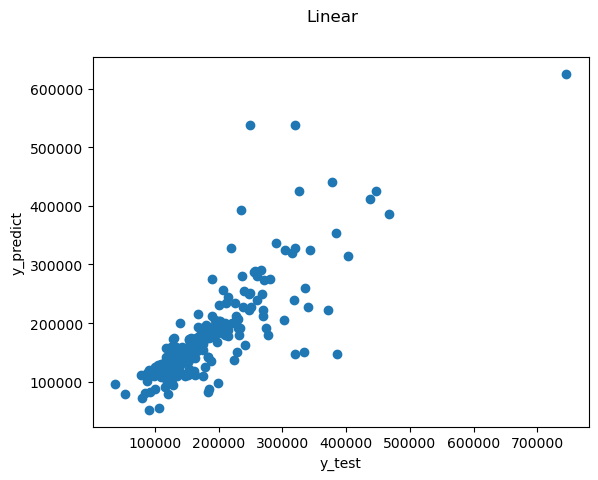

In [46]:
print("r2:", round(r2_score(y_test, y_pred), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))
Plot_Scatter(y_test, y_pred, "Linear")

In [47]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [48]:
y_pred2 = knn.predict(X_test)

r2: 0.67
MAE:  28734.20182648402
RMSE:  47460.818313663294


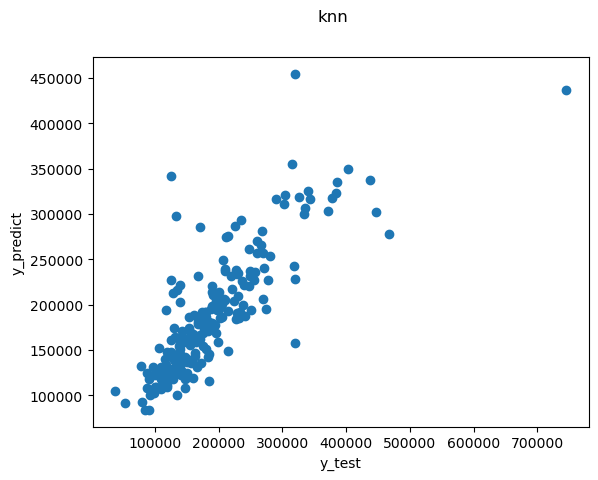

In [49]:
print("r2:", round(r2_score(y_test, y_pred2), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred2))
print("RMSE: ", mean_squared_error(y_test, y_pred2, squared=False))
Plot_Scatter(y_test, y_pred2, "knn")

In [50]:
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
reg = make_pipeline(StandardScaler(),
SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [51]:
y_pred3 = reg.predict(X_test)

r2: 0.71
MAE:  25378.549969940526
RMSE:  44390.87304755544


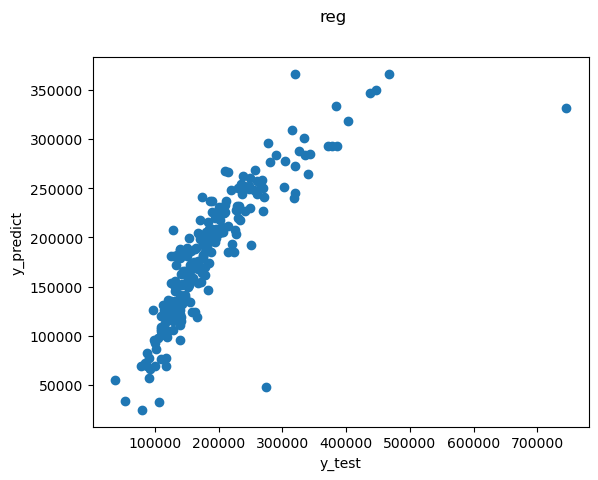

In [52]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "reg")

In [53]:
reggb = GradientBoostingRegressor(random_state=0)
reggb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [54]:
y_pred3 = reggb.predict(X_test)

r2: 0.85
MAE:  19976.472396556943
RMSE:  32607.306043327288


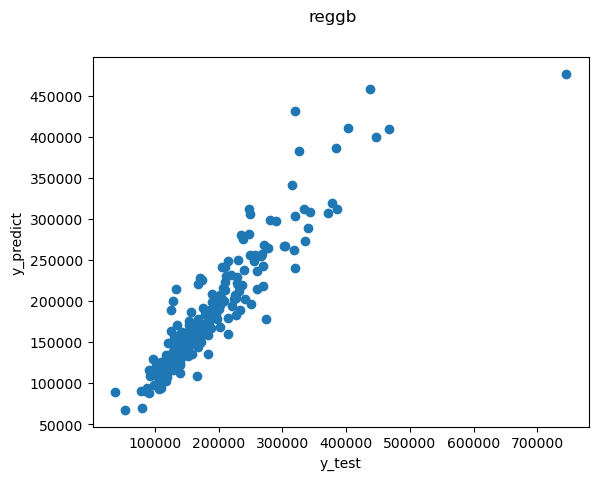

In [55]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "reggb")